## Compute fisher Z transform between FC_sim and FC_emp

Author: Yile Wang

Date: 02/20/2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
import scipy
import seaborn as sns
colorcoding = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
import sys
sys.path.append('/Users/yat-lok/workspaces/tvbtools')
from tools.statools import stats_calculator
from tools.visualizer import violin_dot

In [2]:
def fisher_z(corr_matrix):
    # Compute the Fisher's z transform of the correlation matrix
    z_matrix = np.arctanh(corr_matrix)
    return z_matrix

## Single Go analysis

In [3]:
# read tvb_para
df = pd.read_excel('/Users/yat-lok/workspaces/data4project/mega_table.xlsx', sheet_name='tvb_parameters')
df_corr_max = pd.DataFrame()
for grp, case, go in zip(df['group'], df['caseid'], df['Go']):
    emp_path = '/Users/yat-lok/workspaces/data4project/lateralization/ts_fmri/'+grp+'-TS/'+case+'/'+'ROICorrelation_FisherZ_'+case+'.mat'
    mat = scipy.io.loadmat(emp_path)
    # emp FC
    emp_tril = np.tril(np.array(mat['ROICorrelation_FisherZ']), -1)
    emp_vec = emp_tril[np.nonzero(emp_tril)].flatten()
    # sim FC
    sim_path = '/Users/yat-lok/workspaces/corr_Goptimal/'+grp+'/'+case+'/'+grp+'_'+case+'_'+str(go)+'.xlsx'
    sim_ts = pd.read_excel(sim_path)
    sim_tril = np.tril(fisher_z(sim_ts.iloc[:,1:].corr().to_numpy()), -1)
    sim_vec = sim_tril[np.nonzero(sim_tril)].flatten()
    corr_dict = {'group':grp, 'caseid':case,'Go':go, 'max_corr':np.corrcoef(emp_vec, sim_vec)[0, 1]}
    df_corr_max = pd.concat([df_corr_max, pd.DataFrame.from_dict([corr_dict])], ignore_index=True)

/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_27210/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_27210/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_27210/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_27210/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_27210/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh
  z_matrix = np.arctanh(corr_matrix)
/var/folders/gz/j8z1vy514q51r1gxg3zf8s_h0000gn/T/ipykernel_27210/1553299805.py:3: RuntimeWarning: divide by zero encountered in arctanh

In [6]:
stats_table = stats_calculator(df_corr_max, tails='less', asterisk=False)

In [ ]:
print(stats_table)

In [ ]:
print(df_corr_max)

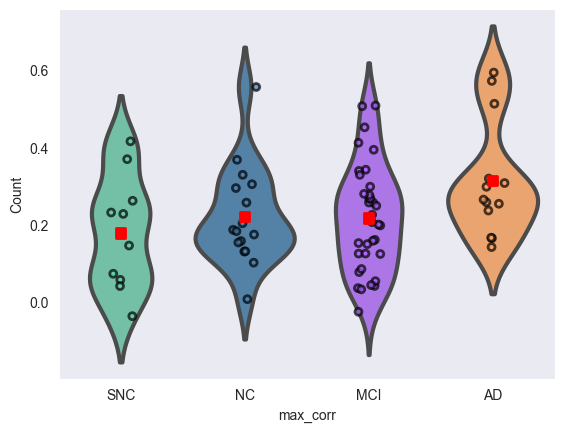

In [7]:
order = ['SNC', 'NC', 'MCI', 'AD']
pairs = [('SNC', 'AD'),('NC', 'AD'), ('MCI', 'AD'), ('SNC', 'MCI'), ('NC', 'MCI'), ('SNC', 'NC')]
violin_dot(data=df_corr_max, x='group', y='max_corr', stats_table = stats_table, pairs=pairs, order=order)

## Go range analysis

In [ ]:
# read tvb_para
df = pd.read_excel('/Users/yat-lok/workspaces/data4project/mega_table.xlsx', sheet_name='tvb_parameters')
df_corr = pd.DataFrame()
for grp, case in zip(df['group'], df['caseid']):
    emp_path = '/Users/yat-lok/workspaces/data4project/lateralization/ts_fmri/'+grp+'-TS/'+case+'/'+'ROICorrelation_FisherZ_'+case+'.mat'
    mat = scipy.io.loadmat(emp_path)
    emp_tril = np.tril(np.array(mat['ROICorrelation_FisherZ']), -1)
    emp_vec = emp_tril[np.nonzero(emp_tril)].flatten()
    corr_dict = {'group':grp, 'caseid':case}
    for g in np.arange(0.01, 0.071, 0.01):
        sim_path = '/Users/yat-lok/workspaces/_Goptimal/'+grp+'/'+case+'/'+grp+'_'+case+'_'+str(g)+'.xlsx'
        sim_ts = pd.read_excel(sim_path)
        sim_tril = np.tril(fisher_z(sim_ts.iloc[:,1:].corr().to_numpy()), -1)
        sim_vec = sim_tril[np.nonzero(sim_tril)].flatten()
        corr_dict[str(g)] = np.corrcoef(emp_vec, sim_vec)[0, 1]
    df_corr = pd.concat([df_corr, pd.DataFrame.from_dict([corr_dict])], ignore_index=True)

In [ ]:
df_corr_index = df_corr.set_index('caseid')
df_ci = pd.DataFrame()
for grp, case in zip(df['group'], df['caseid']):
    for i in np.arange(0.01, 0.071, 0.01):
        ci_dict={'group':grp, 'caseid':case, 'Go': i, 'Corr': df_corr_index.loc[case, str(i)]}
        df_ci = pd.concat([df_ci, pd.DataFrame.from_dict([ci_dict])], ignore_index=True)
print(df_ci)

In [ ]:
grp_lines = df_corr.groupby(['group']).mean(numeric_only=True)
grp_lines = grp_lines.reindex(['SNC','NC','MCI','AD'])
# order = ['AD','MCI','NC','SNC']
fig, ax = plt.subplots(figsize=(15,7),dpi=300)
ax = sns.lineplot(data=grp_lines.T, palette=colorcoding)
# ax = sns.lineplot(data=df_ci, x='Go', y = 'Corr', hue='group', palette=colorcoding)
# ax = sns.pointplot(data=df_ci, x='Go', y = 'Corr', hue='group', palette=colorcoding)
# ax = sns.violinplot(data=df_ci, x='Go', y='Corr', hue='group', inner=None)
plt.legend()
plt.title('Global Coupling Optimal Trajectory (Mean)')
plt.xlabel('G optimal')
plt.ylabel('Correlation Coefficient')

In [ ]:
df_corr.to_excel('/Users/yat-lok/Desktop/go_low_noise_original.xlsx')
grp_lines.to_excel('/Users/yat-lok/Desktop/go_low_noise_group.xlsx')